In [1]:
import pandas as pd
import numpy as np 

import seaborn as sns 
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
dataset=pd.read_csv("senate_econ_dataset.csv")
dataset.head()

,Unnamed: 0,state,state_po,county_name,fips,total_votes,dem_votes,rep_votes,oth_votes,dem_name,...,county_weight,dem_votes_ratio_to_statewide,rep_votes_ratio_to_statewide,dem_county_weight,rep_county_weight,dem/rep_county_weight,median_household_income,median_household_income_ratio_to_statewide,unemployment_rate,unemployment_rate_ratio_to_statewide
0,0,ALABAMA,AL,AUTAUGA,1001,17740.0,3814.0,13359.0,567.0,WILL BOYD,...,0.840438,0.008733,0.014179,0.585095,0.950007,41.264302,66444.0,1.231,2.3,0.884615
1,1,ALABAMA,AL,BALDWIN,1003,73197.0,11478.0,59501.0,2218.0,WILL BOYD,...,3.467732,0.026281,0.063154,1.760808,4.231333,27.881088,65658.0,1.216,2.4,0.923077
2,2,ALABAMA,AL,BARBOUR,1005,6543.0,2620.0,3861.0,62.0,WILL BOYD,...,0.309977,0.005999,0.004098,0.401927,0.274570,98.077470,38649.0,0.716,4.1,1.576923
3,3,ALABAMA,AL,BIBB,1007,5869.0,971.0,4694.0,204.0,WILL BOYD,...,0.278046,0.002223,0.004982,0.148958,0.333807,29.898122,48454.0,0.897,2.5,0.961538
4,4,ALABAMA,AL,BLOUNT,1009,16586.0,1130.0,14904.0,552.0,WILL BOYD,...,0.785767,0.002587,0.015819,0.173350,1.059878,10.958305,56894.0,1.054,2.2,0.846154


In [3]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1967 entries, 0 to 1966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  1967 non-null   int64  
 1   state                                       1967 non-null   object 
 2   state_po                                    1967 non-null   object 
 3   county_name                                 1967 non-null   object 
 4   fips                                        1967 non-null   int64  
 5   total_votes                                 1967 non-null   float64
 6   dem_votes                                   1967 non-null   float64
 7   rep_votes                                   1967 non-null   float64
 8   oth_votes                                   1967 non-null   float64
 9   dem_name                                    1967 non-null   object 
 10  rep_name    

In [4]:
dataset_rep=dataset.copy()

In [5]:
dataset[dataset.statewide_dem_votes==0].state.value_counts()

state
UTAH    29
Name: count, dtype: int64

In [6]:
dataset=dataset[dataset.state!='UTAH']

<h1>Visualize relationship between dem_rep and total votes per county</h1>

<Axes: xlabel='dem/rep'>

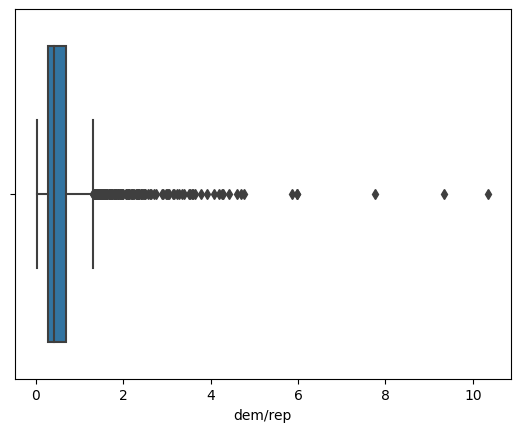

In [7]:
sns.boxplot(x=dataset['dem/rep'])

In [8]:
dataset['dem/rep'].describe()

count    1938.000000
mean        0.614089
std         0.692906
min         0.036364
25%         0.271906
50%         0.419587
75%         0.685292
max        10.352913
Name: dem/rep, dtype: float64

<Axes: xlabel='total_votes'>

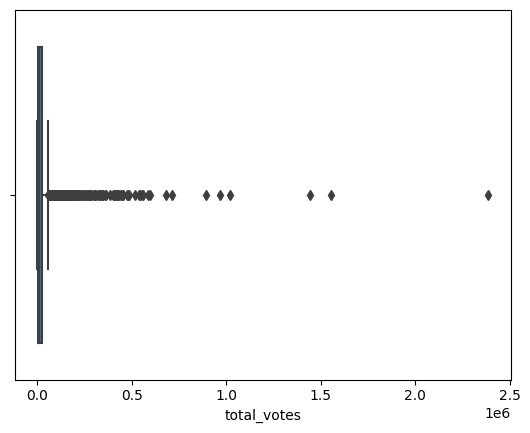

In [10]:
sns.boxplot(x=dataset['total_votes'])

In [11]:
dataset.county_winner.value_counts()

county_winner
REP    1676
DEM     262
Name: count, dtype: int64

In [12]:
#sns.boxplot(x=dataset.loc[dataset.state=='ILLINOIS',['dem/rep']])
ser=dataset.loc[dataset.state=='ILLINOIS',['dem/rep']]
ser

,dem/rep
553,0.340439
554,0.821505
555,0.491534
556,0.691346
557,0.267119
...,...
650,0.812824
651,1.135786
652,0.484068
653,1.009588


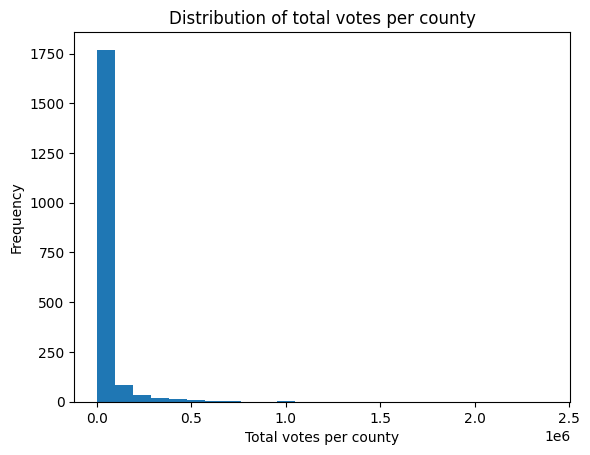

In [13]:
ax = plt.axes()
ax.hist(dataset.total_votes, bins=25);

ax.set(xlabel='Total votes per county', 
       ylabel='Frequency',
       title='Distribution of total votes per county');

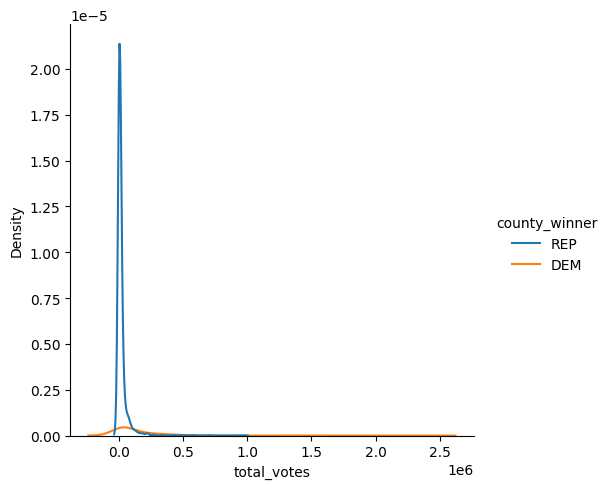

In [14]:
sns.displot(dataset, x="total_votes", hue="county_winner",kind="kde")

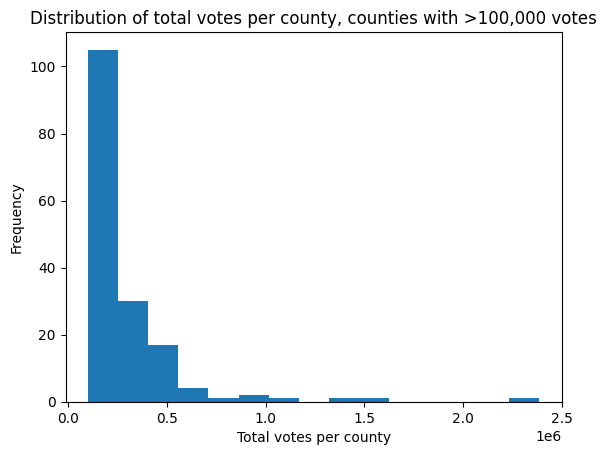

In [15]:
ax = plt.axes()
ax.hist(dataset[dataset.total_votes>100000].total_votes, bins=15);

ax.set(xlabel='Total votes per county', 
       ylabel='Frequency',
       title='Distribution of total votes per county, counties with >100,000 votes');

In [16]:
dataset[dataset.total_votes>100000].county_winner.value_counts()

county_winner
DEM    102
REP     61
Name: count, dtype: int64

In [17]:
dataset[dataset.total_votes<100000].county_winner.value_counts()

county_winner
REP    1615
DEM     160
Name: count, dtype: int64

[Text(0.5, 1.0, '0.38295734362171713')]

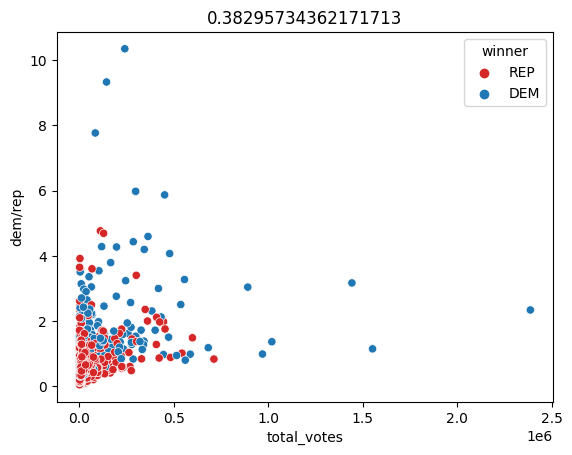

In [18]:
sns.scatterplot(data=dataset,x='total_votes',y='dem/rep',hue='winner',palette={'REP':'tab:red', 'DEM':'tab:blue'}).set(
    title=str(np.corrcoef(dataset.total_votes.values, dataset['dem/rep'].values)[0,1]))

[Text(0.5, 1.0, 'Data for Illinois, 0.7797726845014806')]

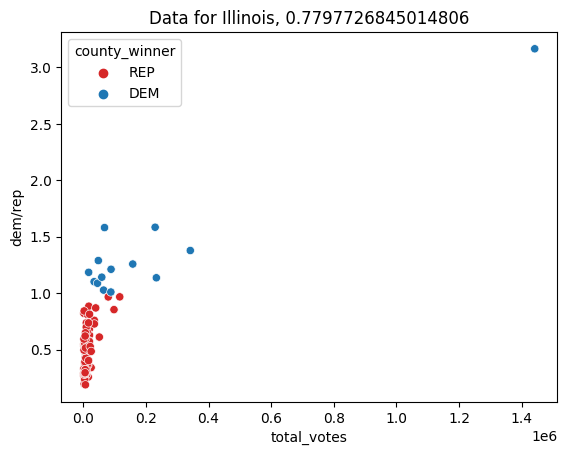

In [19]:
sns.scatterplot(data=dataset[dataset.state=='ILLINOIS'],x='total_votes',y='dem/rep',hue='county_winner',palette={'REP':'tab:red', 'DEM':'tab:blue'}).set(
    title='Data for Illinois, '+str(np.corrcoef(dataset[dataset.state=='ILLINOIS'].total_votes.values, dataset[dataset.state=='ILLINOIS']['dem/rep'].values)[0,1]))

<h3>Look at this with relation to statewide</h3>

[Text(0.5, 1.0, '0.34880869925007707')]

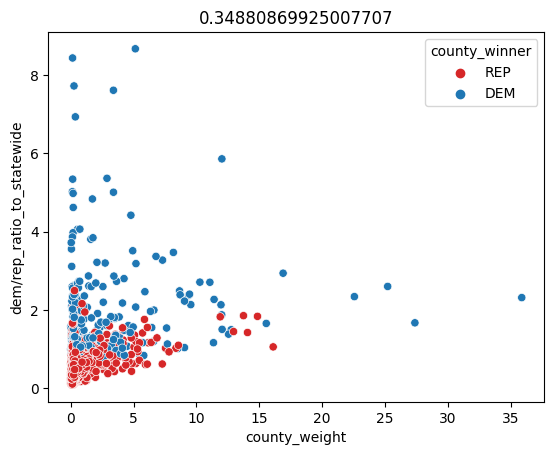

In [20]:
sns.scatterplot(data=dataset,x='county_weight',y='dem/rep_ratio_to_statewide',hue='county_winner',palette={'REP':'tab:red', 'DEM':'tab:blue'}).set(
    title=str(np.corrcoef(dataset.county_weight.values, dataset['dem/rep_ratio_to_statewide'].values)[0,1]))

[Text(0.5, 1.0, '0.2726852628092939')]

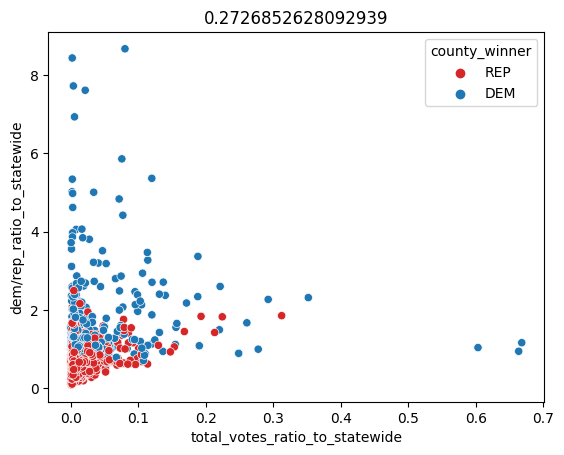

In [21]:
sns.scatterplot(data=dataset,x='total_votes_ratio_to_statewide',y='dem/rep_ratio_to_statewide',hue='county_winner',palette={'REP':'tab:red', 'DEM':'tab:blue'}).set(
    title=str(np.corrcoef(dataset.total_votes_ratio_to_statewide.values, dataset['dem/rep_ratio_to_statewide'].values)[0,1]))

[Text(0.5, 1.0, '0.36947970577018835')]

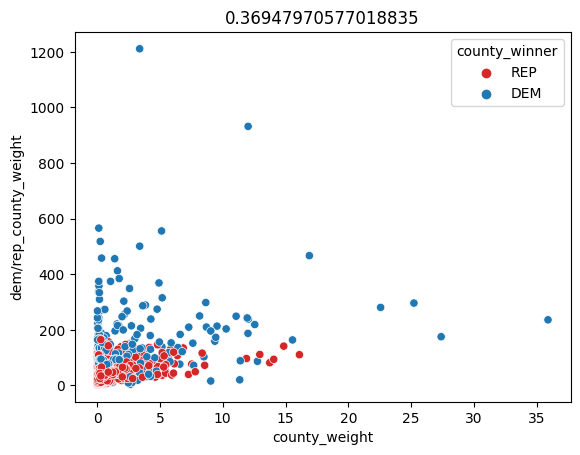

In [22]:
sns.scatterplot(data=dataset,x='county_weight',y='dem/rep_county_weight',hue='county_winner',palette={'REP':'tab:red', 'DEM':'tab:blue'}).set(
    title=str(np.corrcoef(dataset.county_weight.values, dataset['dem/rep_county_weight'].values)[0,1]))

<h1>Look at correlations</h1>

In [23]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1966
Data columns (total 38 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   Unnamed: 0                                  1938 non-null   int64  
 1   state                                       1938 non-null   object 
 2   state_po                                    1938 non-null   object 
 3   county_name                                 1938 non-null   object 
 4   fips                                        1938 non-null   int64  
 5   total_votes                                 1938 non-null   float64
 6   dem_votes                                   1938 non-null   float64
 7   rep_votes                                   1938 non-null   float64
 8   oth_votes                                   1938 non-null   float64
 9   dem_name                                    1938 non-null   object 
 10  rep_name         

In [24]:
df=dataset[['winner','county_winner',
            'dem/rep', 'dem_share', 'rep_share', 
                      'dem/rep_ratio_to_statewide', 'dem_votes_ratio_to_statewide', 'rep_votes_ratio_to_statewide', 
                      'dem_county_weight', 'rep_county_weight', 'dem/rep_county_weight', 
                      'median_household_income','median_household_income_ratio_to_statewide',
                      'unemployment_rate','unemployment_rate_ratio_to_statewide']]

In [25]:
df

,winner,county_winner,dem/rep,dem_share,rep_share,dem/rep_ratio_to_statewide,dem_votes_ratio_to_statewide,rep_votes_ratio_to_statewide,dem_county_weight,rep_county_weight,dem/rep_county_weight,median_household_income,median_household_income_ratio_to_statewide,unemployment_rate,unemployment_rate_ratio_to_statewide
0,REP,REP,0.285500,0.214994,0.753044,0.615885,0.008733,0.014179,0.585095,0.950007,41.264302,66444.0,1.231,2.3,0.884615
1,REP,REP,0.192904,0.156810,0.812889,0.416136,0.026281,0.063154,1.760808,4.231333,27.881088,65658.0,1.216,2.4,0.923077
2,REP,REP,0.678581,0.400428,0.590096,1.463843,0.005999,0.004098,0.401927,0.274570,98.077470,38649.0,0.716,4.1,1.576923
3,REP,REP,0.206860,0.165446,0.799796,0.446241,0.002223,0.004982,0.148958,0.333807,29.898122,48454.0,0.897,2.5,0.961538
4,REP,REP,0.075819,0.068130,0.898589,0.163557,0.002587,0.015819,0.173350,1.059878,10.958305,56894.0,1.054,2.2,0.846154
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1962,REP,REP,0.595108,0.372236,0.625493,0.607241,0.063648,0.104814,4.582623,7.546624,43.721386,94506.0,1.407,2.5,0.862069
1963,REP,REP,0.492947,0.329587,0.668605,0.502997,0.005840,0.011610,0.420473,0.835935,36.215794,63216.0,0.941,3.0,1.034483
1964,REP,REP,0.459369,0.314689,0.685046,0.468735,0.002722,0.005807,0.195979,0.418102,33.748895,57188.0,0.852,3.4,1.172414
1965,REP,REP,0.885401,0.468441,0.529073,0.903452,0.026601,0.029444,1.915287,2.119964,65.048578,64640.0,0.963,2.5,0.862069


In [26]:
num_cols=df.select_dtypes('number').columns
skew_vals = df[num_cols].skew()

#skew_vals = df[df.columns[df.dtypes==float]].skew()
skew_vals.sort_values(ascending=False)

rep_votes_ratio_to_statewide                  10.584717
dem_votes_ratio_to_statewide                   8.026164
dem_county_weight                              7.957735
dem/rep_county_weight                          6.672619
dem/rep                                        5.405633
rep_county_weight                              5.252255
dem/rep_ratio_to_statewide                     4.804374
unemployment_rate_ratio_to_statewide           2.095859
unemployment_rate                              1.831096
median_household_income                        1.214054
median_household_income_ratio_to_statewide     0.908575
dem_share                                      0.870196
rep_share                                     -0.922365
dtype: float64

In [27]:
skew_limit=0.75
non_skewed_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) <= {}'.format(skew_limit)))

non_skewed_cols

,Skew


In [28]:
df_raw=df.copy()

In [29]:
#df=df_raw.copy()

In [30]:
for col in num_cols.values:
    df[col] = df[col].apply(np.log)

C:\Users\Jade\AppData\Local\Temp\ipykernel_7348\2646535329.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = df[col].apply(np.log)


In [31]:
skew_vals = df[num_cols].skew()

#skew_vals = df[df.columns[df.dtypes==float]].skew()
skew_vals.sort_values(ascending=False)

unemployment_rate_ratio_to_statewide          0.583292
dem/rep_ratio_to_statewide                    0.515306
dem/rep                                       0.409114
dem_votes_ratio_to_statewide                  0.400975
rep_votes_ratio_to_statewide                  0.322811
dem_county_weight                             0.298717
unemployment_rate                             0.259597
median_household_income                       0.239752
median_household_income_ratio_to_statewide    0.107275
rep_county_weight                             0.064912
dem/rep_county_weight                        -0.006412
dem_share                                    -0.408457
rep_share                                    -2.091306
dtype: float64

In [32]:
skew_limit=0.75
skewed_cols = (skew_vals
             .sort_values(ascending=False)
             .to_frame()
             .rename(columns={0:'Skew'})
             .query('abs(Skew) > {}'.format(skew_limit)))

skewed_cols

,Skew
rep_share,-2.091306


In [33]:
from scipy import stats

df.loc[:,['rep_share']]=stats.boxcox(df_raw.rep_share.values)[0]

In [34]:
df.rep_share.skew()

-0.17759332350881402

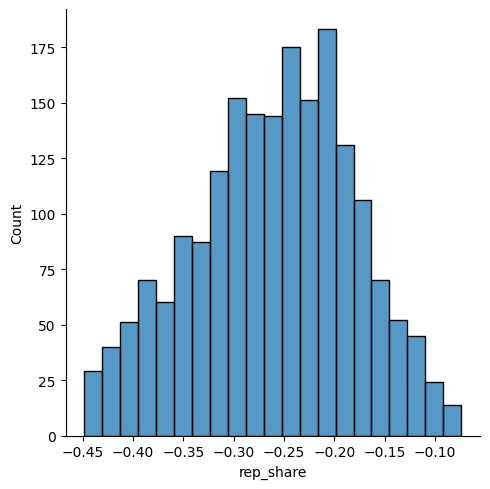

In [35]:
sns.displot(df, x="rep_share")

In [36]:
df.replace({'DEM':True,"REP":False},inplace=True)
df_raw.replace({'DEM':True,"REP":False},inplace=True)
df.rename(columns={"winner" : "dem_winner",'county_winner':'county_dem_winner'},inplace=True)
df_raw.rename(columns={"winner" : "dem_winner",'county_winner':'county_dem_winner'},inplace=True)

C:\Users\Jade\AppData\Local\Temp\ipykernel_7348\3042242251.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.replace({'DEM':True,"REP":False},inplace=True)
C:\Users\Jade\AppData\Local\Temp\ipykernel_7348\3042242251.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df.rename(columns={"winner" : "dem_winner",'county_winner':'county_dem_winner'},inplace=True)


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1966
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   dem_winner                                  1938 non-null   bool   
 1   county_dem_winner                           1938 non-null   bool   
 2   dem/rep                                     1938 non-null   float64
 3   dem_share                                   1938 non-null   float64
 4   rep_share                                   1938 non-null   float64
 5   dem/rep_ratio_to_statewide                  1938 non-null   float64
 6   dem_votes_ratio_to_statewide                1938 non-null   float64
 7   rep_votes_ratio_to_statewide                1938 non-null   float64
 8   dem_county_weight                           1938 non-null   float64
 9   rep_county_weight                           1938 non-null   float64
 10  dem/rep_county_we

<h3>In transformed data</h3>

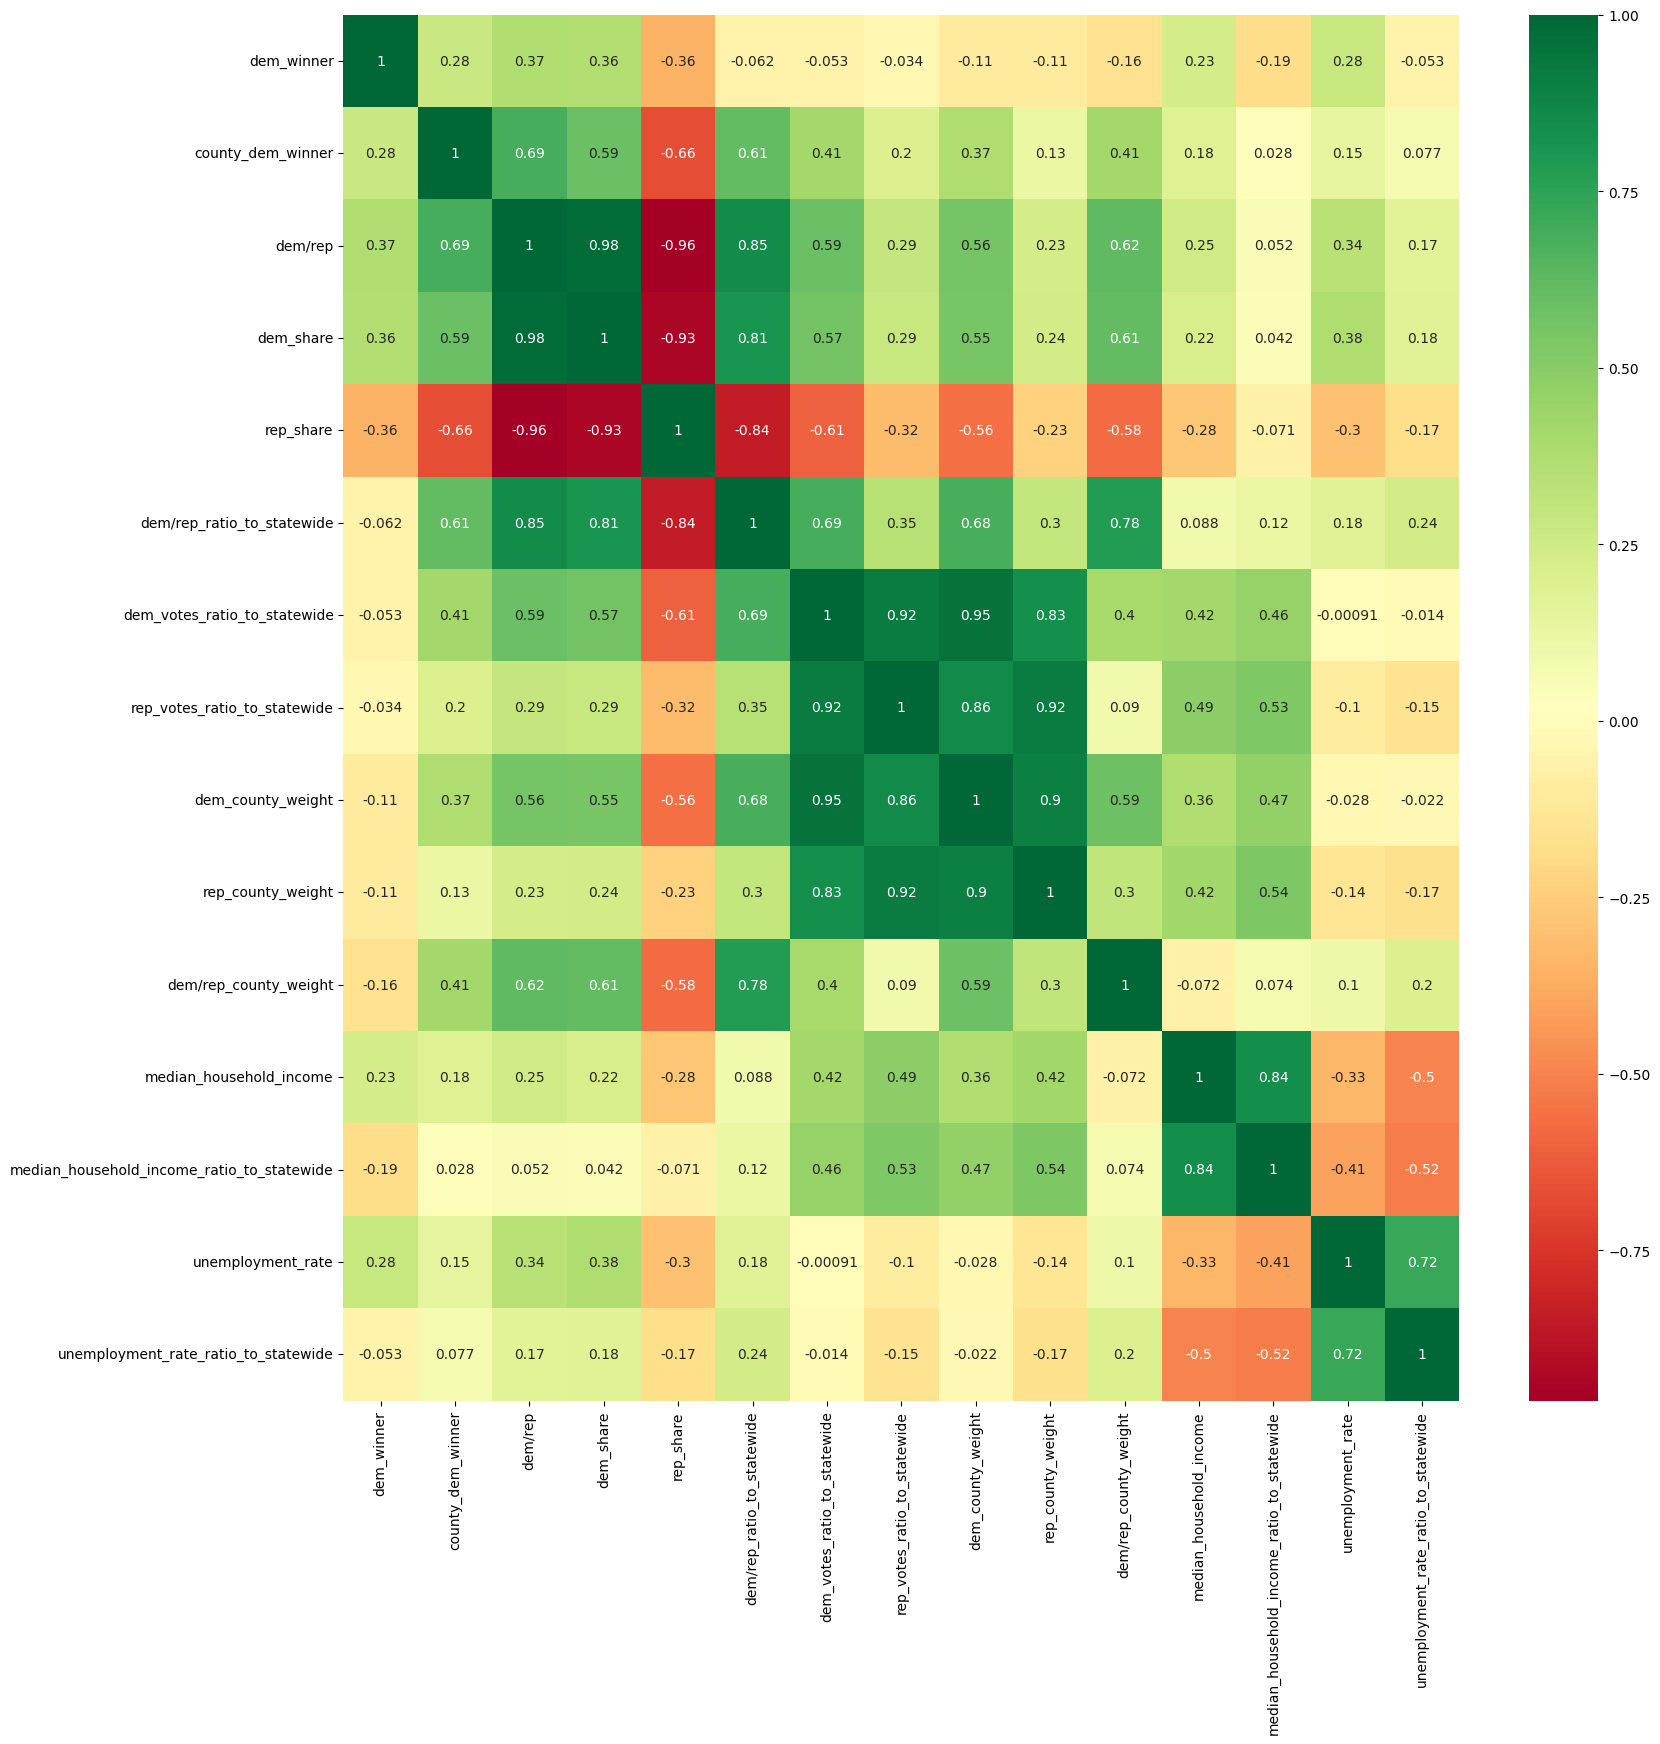

In [38]:
plt.figure(figsize=(18,18))
sns.heatmap(df.corr(),annot=True,cmap='RdYlGn')

plt.show()

In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1966
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   dem_winner                                  1938 non-null   bool   
 1   county_dem_winner                           1938 non-null   bool   
 2   dem/rep                                     1938 non-null   float64
 3   dem_share                                   1938 non-null   float64
 4   rep_share                                   1938 non-null   float64
 5   dem/rep_ratio_to_statewide                  1938 non-null   float64
 6   dem_votes_ratio_to_statewide                1938 non-null   float64
 7   rep_votes_ratio_to_statewide                1938 non-null   float64
 8   dem_county_weight                           1938 non-null   float64
 9   rep_county_weight                           1938 non-null   float64
 10  dem/rep_county_we

[Text(0.5, 1.0, 'Transformed data')]

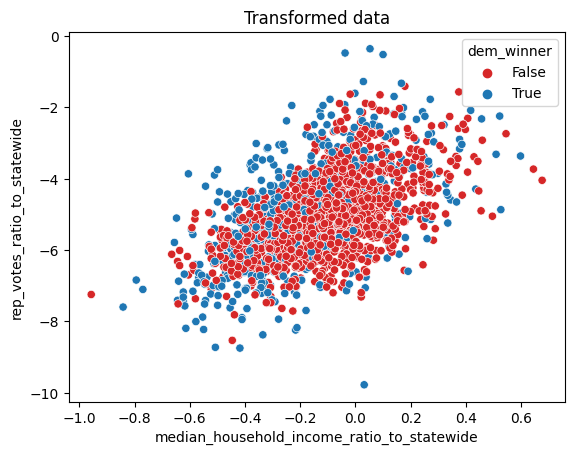

In [40]:
sns.scatterplot(data=df,x='median_household_income_ratio_to_statewide',y='rep_votes_ratio_to_statewide',hue='dem_winner',palette={False:'tab:red', True:'tab:blue'}).set(title='Transformed data')

[Text(0.5, 1.0, 'Transformed data')]

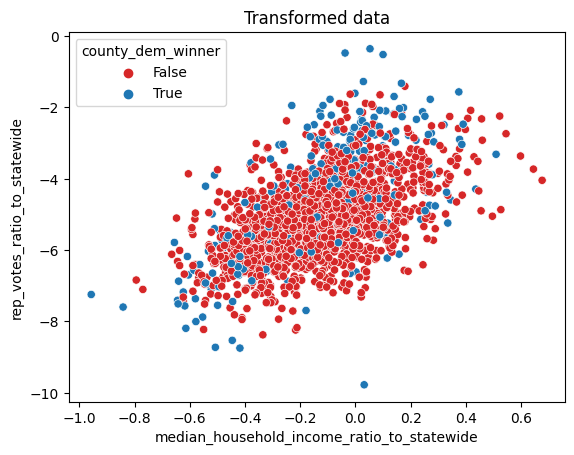

In [41]:
sns.scatterplot(data=df,x='median_household_income_ratio_to_statewide',y='rep_votes_ratio_to_statewide',hue='county_dem_winner',palette={False:'tab:red', True:'tab:blue'}).set(title='Transformed data')

<h3>In raw data</h3>

<h3>In raw data</h3>

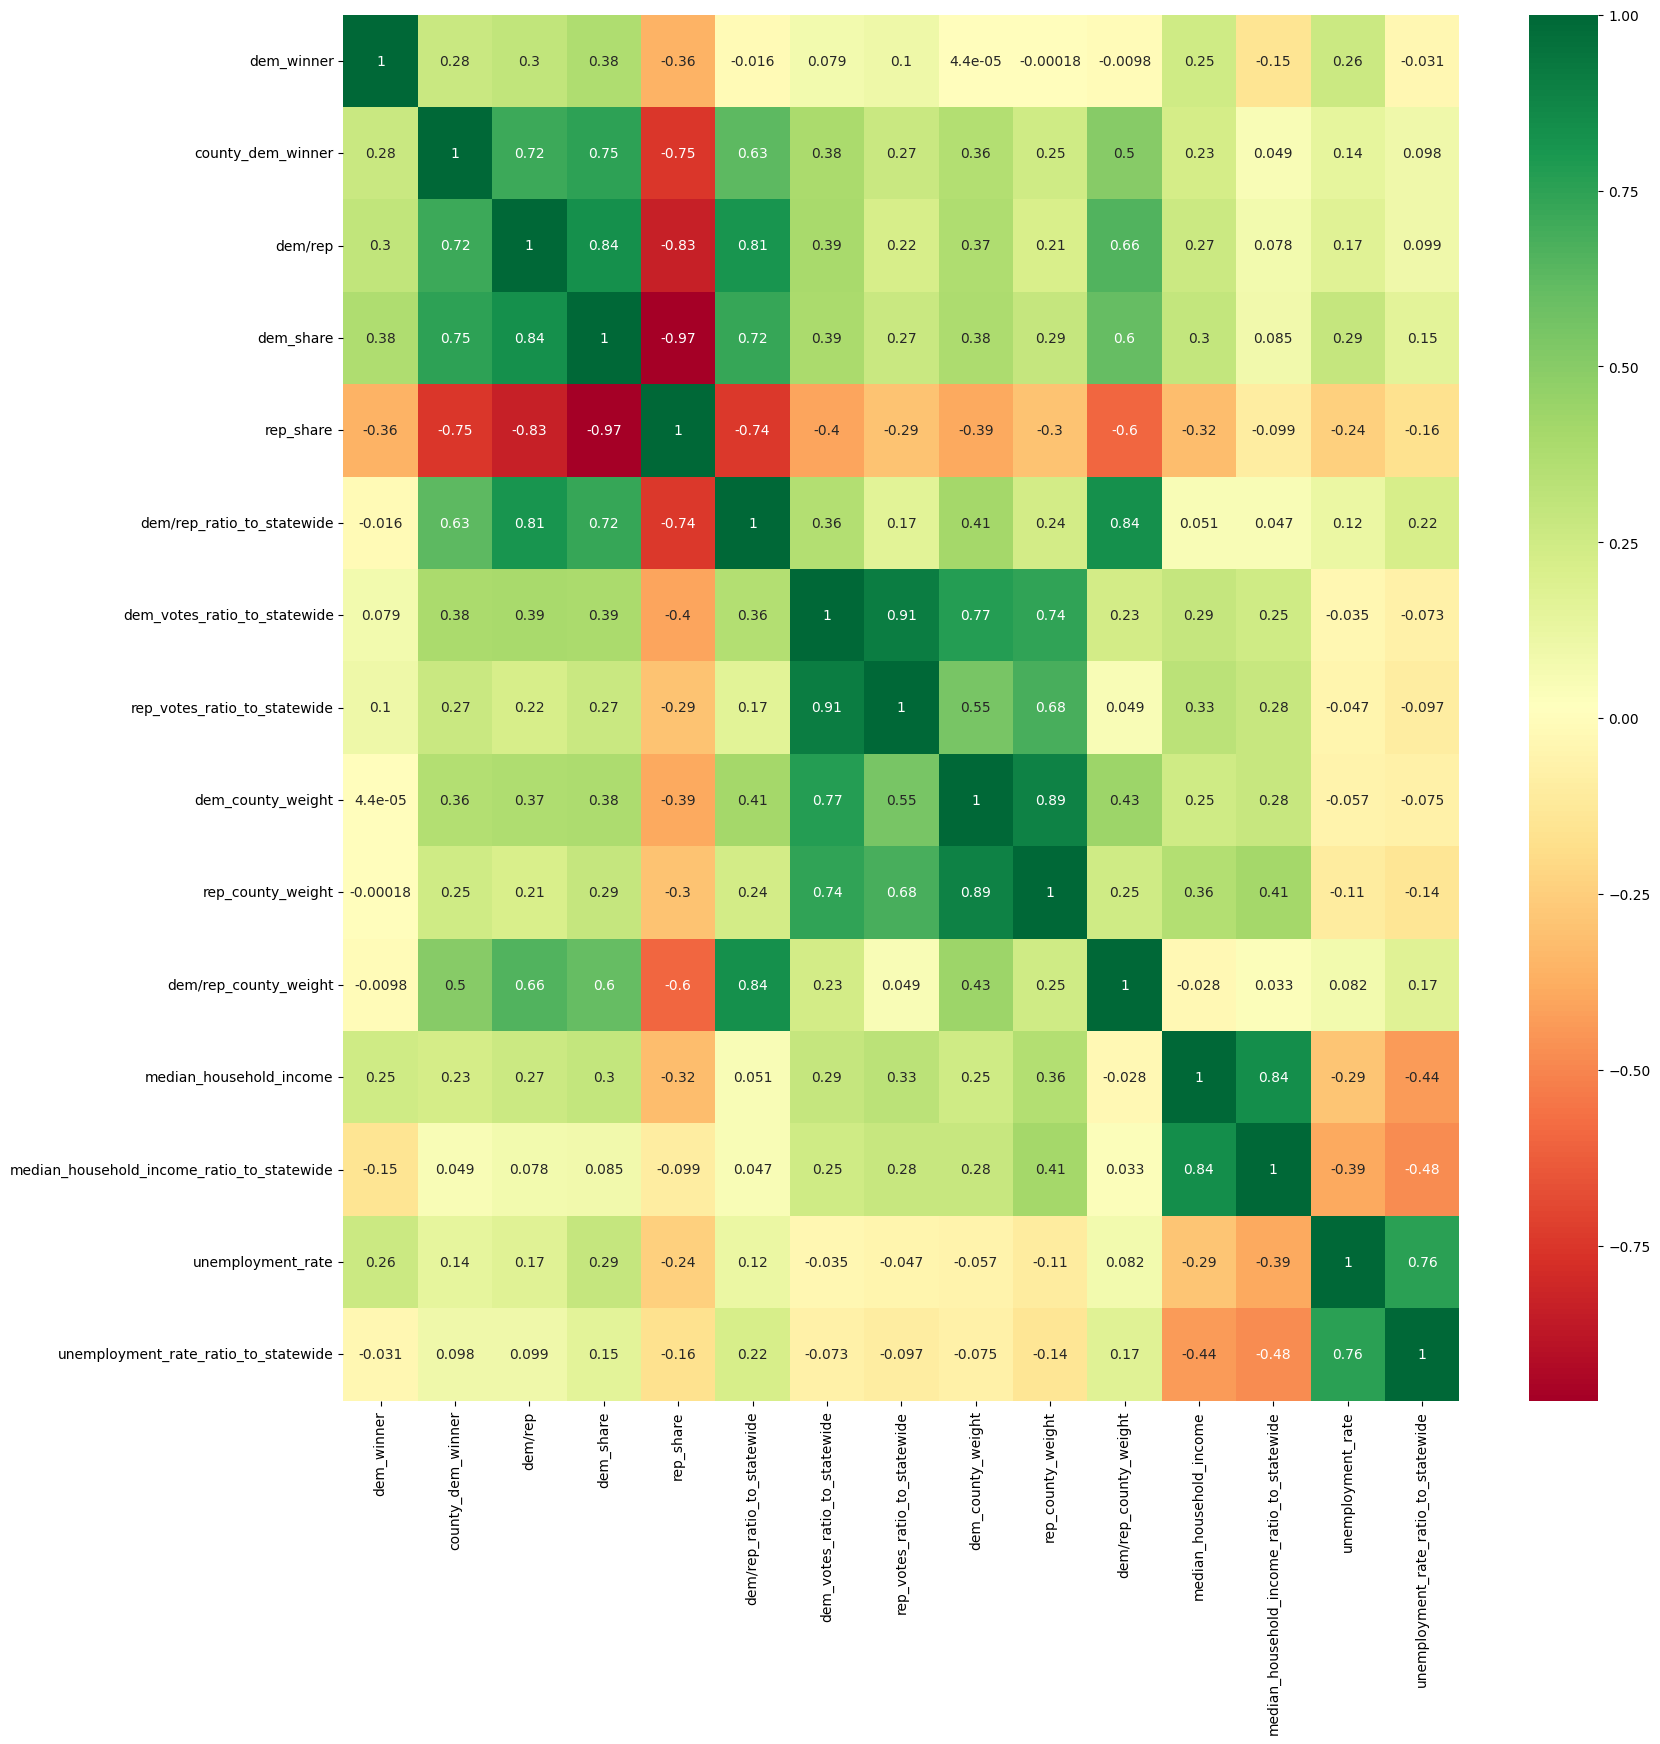

In [40]:
plt.figure(figsize=(18,18))
sns.heatmap(df_raw.corr(),annot=True,cmap='RdYlGn')

plt.show()

[Text(0.5, 1.0, 'Raw data')]

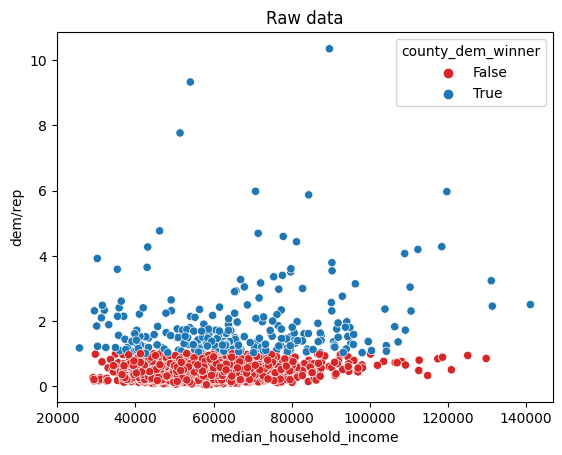

In [42]:
sns.scatterplot(data=df_raw,x='median_household_income',y='dem/rep',hue='county_dem_winner',palette={False:'tab:red', True:'tab:blue'}).set(title='Raw data')

<h1>HYPOTHESIS TESTING</h1>

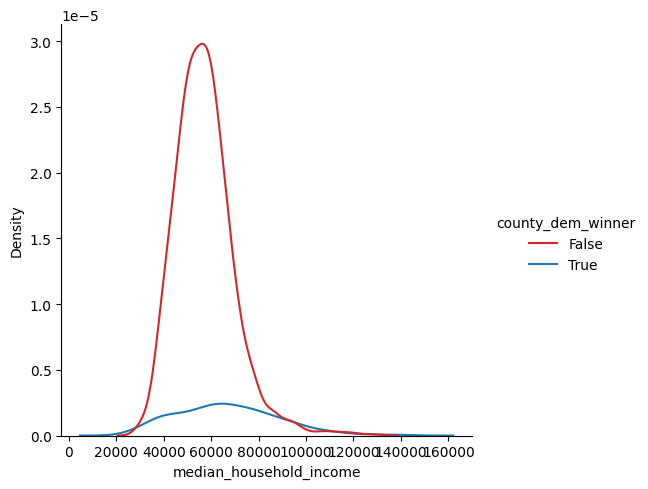

In [42]:
sns.displot(df_raw, x="median_household_income", hue="county_dem_winner",kind="kde",palette={False:'tab:red', True:'tab:blue'})

In [43]:
df_raw.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1938 entries, 0 to 1966
Data columns (total 15 columns):
 #   Column                                      Non-Null Count  Dtype  
---  ------                                      --------------  -----  
 0   dem_winner                                  1938 non-null   bool   
 1   county_dem_winner                           1938 non-null   bool   
 2   dem/rep                                     1938 non-null   float64
 3   dem_share                                   1938 non-null   float64
 4   rep_share                                   1938 non-null   float64
 5   dem/rep_ratio_to_statewide                  1938 non-null   float64
 6   dem_votes_ratio_to_statewide                1938 non-null   float64
 7   rep_votes_ratio_to_statewide                1938 non-null   float64
 8   dem_county_weight                           1938 non-null   float64
 9   rep_county_weight                           1938 non-null   float64
 10  dem/rep_county_we

In [45]:
alpha=0.05
dem_counties_mhi=df_raw[df_raw.county_dem_winner==True].median_household_income.values
rep_counties_mhi=df_raw[df_raw.county_dem_winner==False].median_household_income.values
t_value, p_value = stats.ttest_ind(dem_counties_mhi, rep_counties_mhi, equal_var = False, alternative='greater')

if p_value <alpha:
    print("Conclusion: since p_value {: .10f} is less than alpha {} ". format (p_value ,alpha))
    print("Reject the null hypothesis that Median household income values in counties won by democrats are less or equal than in counties won by republicans.")
    
else:
    print("Conclusion: since p_value {: .10f} is greater than alpha {} ". format (p_value ,alpha))
    print("Fail to reject the null hypothesis that Median household income values in counties won by democrats are less or equal than in counties won by republicans.")

Conclusion: since p_value  0.0000000000 is less than alpha 0.05 
Reject the null hypothesis that Median household income values in counties won by democrats are less or equal than in counties won by republicans.
